# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص عکسهای مات و معیاری برای انتخاب تصویر بهتر بر اساس  لبه ها</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">واریانس لبه ها میتواند معیار خوبه باشد!</div>

In [1]:
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی روی دو تصویر مات و غیر مات</div>

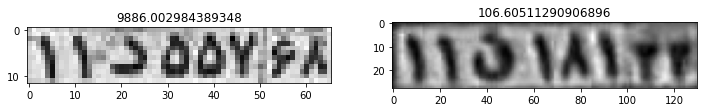

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image1 = cv2.imread('images/plate_cropped.jpg',0)
image2 = cv2.imread('images/plate3_cropped.jpg',0)

metric_image1 = variance_of_laplacian(image1)
metric_image2 = variance_of_laplacian(image2)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image1, cmap='gray');plt.title(metric_image1);
plt.subplot(122);plt.imshow(image2, cmap='gray');plt.title(metric_image2);


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی روی تصویر وبکم</div>

In [3]:
import cv2

th = 100

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    metric = variance_of_laplacian(gray)
    
    color = (0, 0, 255) #Red
    if metric >200:
        color = (0, 255, 0) #Green
        
    cv2.putText(frame, str(metric),(30,30), cv2.FONT_HERSHEY_COMPLEX, 1,color)
    cv2.imshow('Webcam', frame)    
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()      